Train on 6000 samples, validate on 1000 samples
Epoch 1/100
6000/6000 [==============================] - 1s 205us/step - loss: 55.7844 - val_loss: 53.4170
Epoch 2/100
6000/6000 [==============================] - 1s 118us/step - loss: 51.1918 - val_loss: 53.1082
Epoch 3/100
6000/6000 [==============================] - 1s 119us/step - loss: 50.4111 - val_loss: 53.0058
Epoch 4/100
6000/6000 [==============================] - 1s 120us/step - loss: 49.5170 - val_loss: 52.9012
Epoch 5/100
6000/6000 [==============================] - 1s 116us/step - loss: 48.3962 - val_loss: 52.7497
Epoch 6/100
6000/6000 [==============================] - 1s 118us/step - loss: 47.0008 - val_loss: 52.5026
Epoch 7/100
6000/6000 [==============================] - 1s 114us/step - loss: 45.3462 - val_loss: 52.2649
Epoch 8/100
6000/6000 [==============================] - 1s 122us/step - loss: 43.5073 - val_loss: 51.8787
Epoch 9/100
6000/6000 [==============================] - 1s 115us/step - loss: 41.5978 - val_los

Epoch 52/100
6000/6000 [==============================] - 2s 357us/step - loss: 20.7604 - val_loss: 57.2495
Epoch 53/100
6000/6000 [==============================] - 2s 376us/step - loss: 20.0970 - val_loss: 57.6498
Epoch 54/100
6000/6000 [==============================] - 2s 377us/step - loss: 19.4336 - val_loss: 58.0280
Epoch 55/100
6000/6000 [==============================] - 2s 368us/step - loss: 18.7734 - val_loss: 58.5411
Epoch 56/100
6000/6000 [==============================] - 2s 360us/step - loss: 18.1579 - val_loss: 58.9424
Epoch 57/100
6000/6000 [==============================] - 2s 358us/step - loss: 17.5609 - val_loss: 59.5539
Epoch 58/100
6000/6000 [==============================] - 2s 363us/step - loss: 16.9924 - val_loss: 59.8204
Epoch 59/100
6000/6000 [==============================] - 2s 352us/step - loss: 16.3718 - val_loss: 60.1188
Epoch 60/100
6000/6000 [==============================] - 2s 370us/step - loss: 15.7808 - val_loss: 60.8808
Epoch 61/100
6000/6000 [====

Epoch 28/100
6000/6000 [==============================] - 4s 720us/step - loss: 48.6828 - val_loss: 53.4551
Epoch 29/100
6000/6000 [==============================] - 4s 711us/step - loss: 48.4770 - val_loss: 53.4484
Epoch 30/100
6000/6000 [==============================] - 4s 718us/step - loss: 48.2787 - val_loss: 53.3906
Epoch 31/100
6000/6000 [==============================] - 4s 715us/step - loss: 48.0517 - val_loss: 53.3528
Epoch 32/100
6000/6000 [==============================] - 4s 709us/step - loss: 47.8226 - val_loss: 53.3099
Epoch 33/100
6000/6000 [==============================] - 4s 719us/step - loss: 47.5837 - val_loss: 53.2510
Epoch 34/100
6000/6000 [==============================] - 4s 729us/step - loss: 47.3526 - val_loss: 53.2059
Epoch 35/100
6000/6000 [==============================] - 4s 713us/step - loss: 47.0949 - val_loss: 53.1662
Epoch 36/100
6000/6000 [==============================] - 4s 718us/step - loss: 46.8222 - val_loss: 53.0806
Epoch 37/100
6000/6000 [====

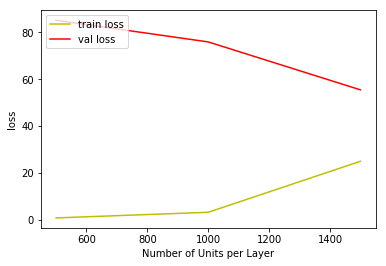

In [52]:
import scipy
import sklearn

import h5py
import scipy.io
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adamax
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

tr_loss_list,cv_loss_list,unit_list = [],[],[]
train_x_data = scipy.io.loadmat('training_input.mat')
train_y_data = scipy.io.loadmat('training_output_expected.mat')

train_x = train_x_data['X_in']
train_y = train_y_data['Y_out']

val_x_data = scipy.io.loadmat('cv_input.mat')
val_y_data = scipy.io.loadmat('cv_output.mat')

val_x = val_x_data['X_in']
val_y = val_y_data['Y_out']

for i in range(3):
    model = Sequential()

    model.add(Dense(units=500*(i+1), input_dim=224, activation="relu", kernel_initializer="normal"))          #hidden Layer 1
    model.add(Dense(units=500*(i+1), activation="relu", kernel_initializer="normal"))                         #hidden Layer 2
    #model.add(Dropout(rate=0.1))
    model.add(Dense(units=500*(i+1), activation="relu", kernel_initializer="normal"))                         #hidden Layer 3
    #model.add(Dropout(rate=0.1))
    #model.add(Dense(units=600, activation="relu", kernel_initializer="normal"))                        #hidden Layer 4
    #model.add(Dense(units=1000, activation="relu", kernel_initializer="normal"))                       #hidden Layer 5
    #model.add(Dense(units=1000, activation="relu", kernel_initializer="normal"))                       #hidden Layer 6
    #model.add(Dense(units=1000, activation="relu", kernel_initializer="normal"))                       #hidden Layer 7
    model.add(Dense(units=32, activation="linear",kernel_initializer="normal"))                         #output Layer

    model.compile(loss='mean_squared_error', optimizer='adamax')
    hist = model.fit(train_x, train_y, epochs=100, batch_size=640, validation_data=(val_x, val_y))
    tr_loss_list.append(hist.history['loss'][-1])
    cv_loss_list.append(hist.history['val_loss'][-1])
    unit_list.append(model.layers[2].output_shape[1]) ㅡ

#from keras.models import load_model
#model.save('ofdm_NN_model_0419.h5')

#val_x_data = scipy.io.loadmat('cv_input.mat')
#val_y_data = scipy.io.loadmat('cv_output.mat')

#val_x = val_x_data['X_in']
#val_y = val_y_data['Y_out']


#loss_and_metrics = model.evaluate(val_x, val_y, batch_size=64)

#print('loss_and_metrics : ' + str(loss_and_metrics))



#test_x_data = scipy.io.loadmat('test_input.mat')

#test_x = test_x_data['X_in']
#yhat = model.predict(test_x)
#scipy.io.savemat('test_output_predicted.mat', dict([('predict', yhat)]))

#yhat = model.predict(train_x)
#scipy.io.savemat('training_output_predicted.mat', dict([('predict', yhat)]))

loss_dict = {}
for i in range(len(unit_list)) :
    loss_dict[unit_list[i]] = [tr_loss_list[i],cv_loss_list[i]]
    
loss_df = pd.DataFrame(loss_dict,index=['training loss','validation loss'],)

excel_writer = pd.ExcelWriter('c:\myPyCode\data\loss.xlsx',engine='xlsxwriter')
loss_df.to_excel(excel_writer,index=True)
excel_writer.save()

tr_series = pd.Series(tr_loss_list,index = unit_list)
cv_series = pd.Series(cv_loss_list,index = unit_list)

fig, loss_ax = plt.subplots()
loss_ax.plot(tr_series, 'y', label='train loss')
loss_ax.scatter(unit_list,tr_loss_list, c='y')
loss_ax.plot(cv_series, 'r', label='val loss')
loss_ax.scatter(unit_list,cv_loss_list, c='r')
loss_ax.set_xlabel('Number of Units per Layer')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.xticks(unit_list)
plt.yticks(tr_loss_list+cv_loss_list,fontsize=7)
plt.grid()
plt.show()

In [ ]:
import scipy

for i in range (6):
    db = str(i*5+10)
    in_file_name = 'test_input_'+db+'.mat'
    test_x_data = scipy.io.loadmat(file_name)

    test_x = test_x_data['X_in']
    yhat = model.predict(test_x)
    
    out_file_name = 'test_output_'+db+'.mat'
    scipy.io.savemat(out_file_name, dict([('predict', yhat)]))

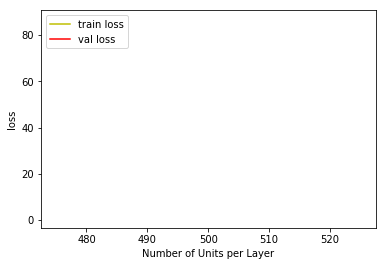

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

tr_loss_list,cv_loss_list,unit_list = [],[],[]

tr_loss_list.append(hist.history['loss'][-1])
cv_loss_list.append(hist.history['val_loss'][-1])
unit_list.append(model.layers[2].output_shape[1])

tr_series = pd.Series(tr_loss_list,index = unit_list)
cv_series = pd.Series(cv_loss_list,index = unit_list)

fig, loss_ax = plt.subplots()
loss_ax.plot(tr_series, 'y', label='train loss')
loss_ax.plot(cv_series, 'r', label='val loss')
loss_ax.set_xlabel('Number of Units per Layer')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

tr_loss_list,cv_loss_list,layer_list = [],[],[]

tr_loss_list.append(hist.history['loss'][-1])
cv_loss_list.append(hist.history['val_loss'][-1])
layer_list.append(len(model.layers)-1)

tr_series = pd.Series(tr_loss_list,index = layer_list)
cv_series = pd.Series(cv_loss_list,index = layer_list)

fig, loss_ax = plt.subplots()
loss_ax.plot(tr_series, 'y', label='train loss')
loss_ax.plot(cv_series, 'r', label='val loss')
loss_ax.set_xlabel('Number of Layers')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.show()

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib tk

loss_excel = pd.read_excel('c:\myPyCode\data\loss.xlsx',index=False)
units = list(loss_excel)
tr_loss = list(loss_excel.iloc[0])
cv_loss = list(loss_excel.iloc[1])
fig, loss_ax = plt.subplots()

loss_ax.plot(units,tr_loss,'y', label='train loss')
loss_ax.scatter(units,tr_loss, c='y')
loss_ax.plot(units,cv_loss, 'r', label='val loss')
loss_ax.scatter(units,cv_loss, c='r')
loss_ax.set_xlabel('Number of Units per Layer')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.xticks(units)
plt.yticks((tr_loss+cv_loss),fontsize=7)
plt.grid()
plt.show()

Units,500,1000,1500
Loss Type,,,
training loss,0.769904,3.178422,24.969938
validation loss,85.221670,75.963327,55.489914


In [ ]:
from keras.models import model_from_json   # 저장된 모델과 가중치 불러오기

json_file = open("neural_network_model_sample", "r") 
loaded_model_json = json_file.read()
json_file.close() 
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("Weights.h5")

In [10]:
from keras.models import model_from_json   # 저장된 모델과 가중치 불러오기
import scipy    # 테스트 데이터 입력 후 결과 확인
import scipy.io

json_file = open("units_1200_layer_8_channel_8.h5", "r", encoding='UTF-8') 
loaded_model_json = json_file.read()
json_file.close() 
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("units_1200_layer_8_channel_8_Weights.h5")


base_file_name = 'test_input_channel_8_'

for i in range(6) :
    file_name = base_file_name+str(10+5*i)+'dB.mat'
    test_x_data = scipy.io.loadmat(file_name)
    test_x = test_x_data['X_in']
    yhat = model.predict(test_x)
    scipy.io.savemat('test_output_predicted_channel_8_'+str(10+5*i)+'dB.mat', dict([('predict', yhat)]))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [11]:
import scipy
import numpy
import pandas as pd
import sklearn
import keras
import tensorflow as tf

import keras.utils 
from keras import utils as np_utils
import h5py
import scipy.io
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adamax
from keras.utils import np_utils

model = Sequential()
act = keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)

model.add(Dense(units=1200, input_dim=224, kernel_initializer="normal"))          #hidden Layer 1
model.add(act)
for j in range(7):
    model.add(Dense(units=1200, kernel_initializer="normal"))                     #hidden Layer 2
    model.add(act)     
    if (j==2):
        model.add(Dropout(0.1))
    
model.add(Dense(units=32, activation="linear", kernel_initializer="normal"))      #output Layer : linear
model.compile(loss='mean_squared_error', optimizer='adamax')
model.load_weights("units_1200_layer_8_channel_8_Weights.h5")

base_file_name = 'test_input_channel_8_'

for i in range(6) :
    file_name = base_file_name+str(10+5*i)+'dB.mat'
    test_x_data = scipy.io.loadmat(file_name)
    test_x = test_x_data['X_in']
    yhat = model.predict(test_x)
    scipy.io.savemat('test_output_predicted_channel_8_'+str(10+5*i)+'dB.mat', dict([('predict', yhat)]))
    
print('done')

done
